<div style="width:100%;text-align: center;"> <img align=middle src="https://www.clipartkey.com/mpngs/m/200-2006710_processmaker-alternative-cflow-cavintek-data-analysis-vector.png" alt="HR" style="height:450px;margin-top:3rem;"> </div>

## HR Analytics: Job Change of Data Scientists

#### A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

#### Features
- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Development index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
data_df = data_df[0:1000].copy()
data = data_df.copy()

**Taking the first 1000 values from the dataset.**

In [3]:
data.shape

(1000, 14)

In [4]:
display(data_df.head())

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
data.drop(['enrollee_id'],axis=1,inplace=True)
pred = data_df['target']

#### Here the label is target where, 0 – Not looking for a job change and, 1 – Looking for a job change.

# Plan of Action
#### We will be looking at the following things:
* Data visualization
* Filling in missing values
* Data Preprocessing
* Encoding

**Missing values are filled with the maximum value for that feature.**                                        
**For encoding, '.get_dummies()' is used.**                                                                    
**Features with less or negligible influence are dropped.**                                         

### Missing values


In [6]:
data.isnull().sum()

city                        0
city_development_index      0
gender                    231
relevent_experience         0
enrolled_university        27
education_level            28
major_discipline          151
experience                  2
company_size              295
company_type              310
last_new_job               17
training_hours              0
target                      0
dtype: int64

# Features

### 1. City
#### This feature has details about the city code.

In [7]:
print("The number of missing values for this feature is",data["city"].isnull().sum())

The number of missing values for this feature is 0


In [8]:
print("The number of unique values for this feature is:",len(data["city"].unique()))

The number of unique values for this feature is: 87


#### We drop the 'city' attribute because it has too many unique values and does not contribute in any way.

In [9]:
data.drop(['city'],axis=1,inplace=True) 

### 2. City Development Index
#### This feature has the developement index of the city (scaled).

In [10]:
print("The number of missing values for this feature is",data["city_development_index"].isnull().sum())

The number of missing values for this feature is 0


In [11]:
print("Value for City Development Index ranges from:",data_df["city_development_index"].describe()[3],"to",data_df["city_development_index"].describe()[7])

Value for City Development Index ranges from: 0.479 to 0.949


<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

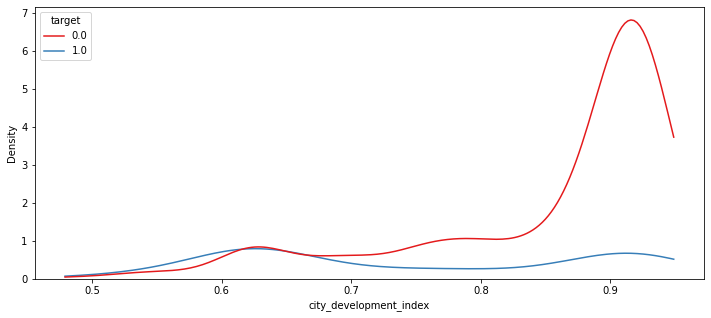

In [12]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=data, x="city_development_index", hue="target",cut = 0,palette='Set1')

#### Here we can see that people living in developed cities have a lesser probability of switching their jobs.

### 3. Gender
#### This feature has the gender of candidate.

In [13]:
print("The number of missing values for this feature is",data["gender"].isnull().sum())

The number of missing values for this feature is 231


In [14]:
print("The number of unique values for this feature is:",len(data["gender"].unique())-1)

The number of unique values for this feature is: 3


<AxesSubplot:xlabel='gender', ylabel='count'>

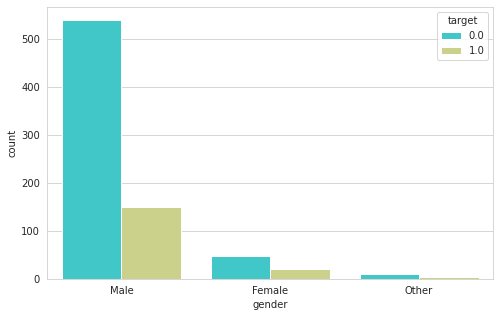

In [15]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'gender',hue='target',data=data,palette='rainbow')

In [16]:
data["gender"].fillna("Male", inplace = True)


gen = pd.get_dummies(data['gender'])
data.drop(['gender'],axis=1,inplace=True)
data = pd.concat([data,gen],axis=1)


data.drop(['Other'],axis=1,inplace=True) 

### 4. Relevant Experience
#### This feature tells whether the candidate has some relevant experience or not.

In [17]:
print("The number of missing values for this feature is",data["relevent_experience"].isnull().sum())

The number of missing values for this feature is 0


In [18]:
print("The number of unique values for this feature is:",len(data["relevent_experience"].unique()))

The number of unique values for this feature is: 2


<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

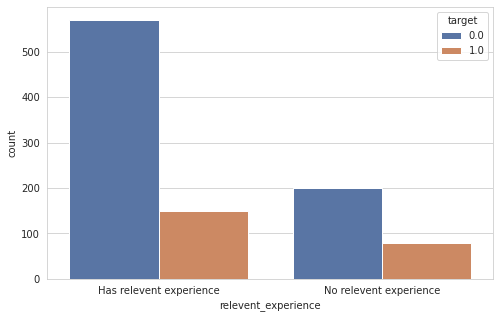

In [19]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'relevent_experience',hue='target',data=data,palette='deep')

In [20]:
rel = pd.get_dummies(data['relevent_experience'])
data.drop(['relevent_experience'],axis=1,inplace=True)
data = pd.concat([data,rel],axis=1)


data.drop(['No relevent experience'],axis=1,inplace=True) 

### 5. Enrolled University
#### This feature mentions the type of university course enrolled if any.

In [21]:
print("The number of missing values for this feature is",data["enrolled_university"].isnull().sum())

The number of missing values for this feature is 27


In [22]:
print("The number of unique values for this feature is:",len(data["enrolled_university"].unique())-1)

The number of unique values for this feature is: 3


<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

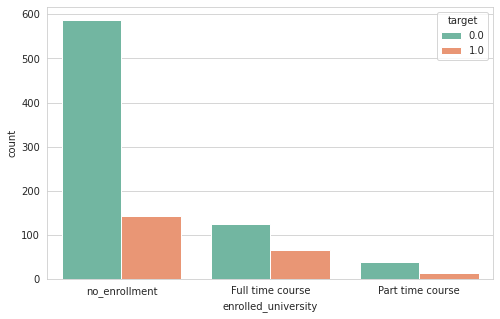

In [23]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'enrolled_university',hue='target',data=data,palette='Set2')

In [24]:
data["enrolled_university"].fillna("no_enrollment", inplace = True)


enr = pd.get_dummies(data['enrolled_university'])
data.drop(['enrolled_university'],axis=1,inplace=True)
data = pd.concat([data,enr],axis=1)


data.drop(['Part time course'],axis=1,inplace=True) 

### 6. Education Level
#### This feature mentions the education level of the candidate.

In [25]:
print("The number of missing values for this feature is",data["education_level"].isnull().sum())

The number of missing values for this feature is 28


In [26]:
print("The number of unique values for this feature is:",len(data["education_level"].unique())-1)

The number of unique values for this feature is: 5


<AxesSubplot:xlabel='education_level', ylabel='count'>

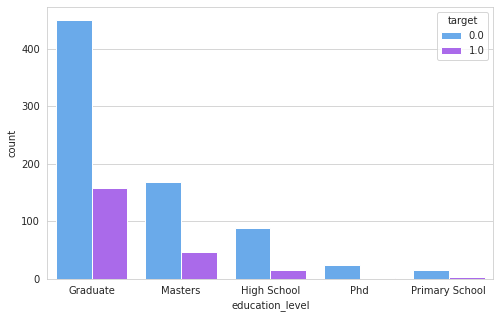

In [27]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'education_level',hue='target',data=data,palette='cool')

In [28]:
data["education_level"].fillna("Graduate", inplace = True)


edu = pd.get_dummies(data['education_level'])
data.drop(['education_level'],axis=1,inplace=True)
data = pd.concat([data,edu],axis=1)


data.drop(['Phd','Primary School'],axis=1,inplace=True) 

### 7. Major Discipline
#### This feature mentions the education major discipline of the candidate.

In [29]:
print("The number of missing values for this feature is",data["major_discipline"].isnull().sum())

The number of missing values for this feature is 151


In [30]:
print("The number of unique values for this feature is:",len(data["major_discipline"].unique())-1)

The number of unique values for this feature is: 6


<AxesSubplot:xlabel='major_discipline', ylabel='count'>

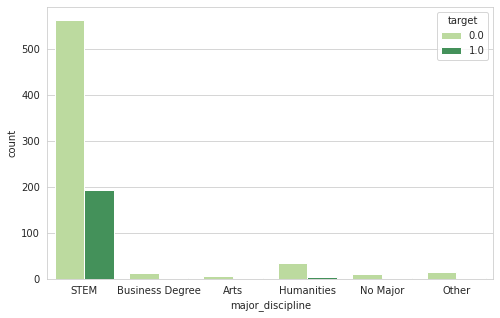

In [31]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'major_discipline',hue='target',data=data,palette='YlGn')

In [32]:
data["major_discipline"].fillna("STEM", inplace = True)


md = pd.get_dummies(data['major_discipline'])
data.drop(['major_discipline'],axis=1,inplace=True)
data = pd.concat([data,md],axis=1)


data.drop(['Business Degree','Arts','Humanities','No Major','Other'],axis=1,inplace=True) 

### 8. Experience
#### This feature mentions the candidate's total experience in years.

In [33]:
print("The number of missing values for this feature is",data["experience"].isnull().sum())

The number of missing values for this feature is 2


In [34]:
print("The number of unique values for this feature is:",len(data["experience"].unique())-1)

The number of unique values for this feature is: 22


In [35]:
data["experience"].value_counts()

>20    177
4       85
5       73
9       73
3       70
2       67
6       60
7       50
10      49
8       43
15      39
11      33
14      29
12      29
1       23
<1      21
13      20
16      16
17      13
18      13
20       8
19       7
Name: experience, dtype: int64

In [36]:
data["experience"].fillna("20", inplace = True)

data.replace({"experience":{">20":20,"<1":1}},inplace = True)

data["experience"] = data["experience"].astype("int64")

<AxesSubplot:xlabel='experience', ylabel='count'>

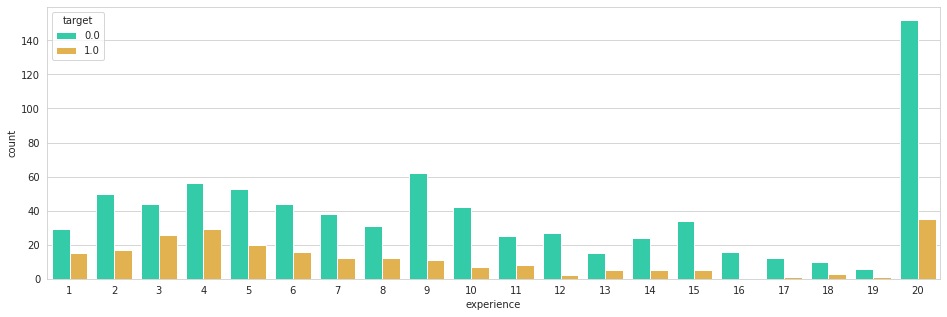

In [37]:
plt.figure(figsize=(16, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'experience',hue="target",data=data,palette='turbo')

In [38]:
def yearexp(x):
    if  (x['experience'])  >= 1 and (x['experience'])  <= 5 :
        return 1
    elif  (x['experience'])  >= 6 and (x['experience'])  <= 10 :
        return 2
    elif  (x['experience'])  >= 11 and (x['experience'])  <= 15 :
        return 3
    else :
        return 4

data['exp_count'] = data.apply(yearexp, axis = 1)

<AxesSubplot:xlabel='exp_count', ylabel='count'>

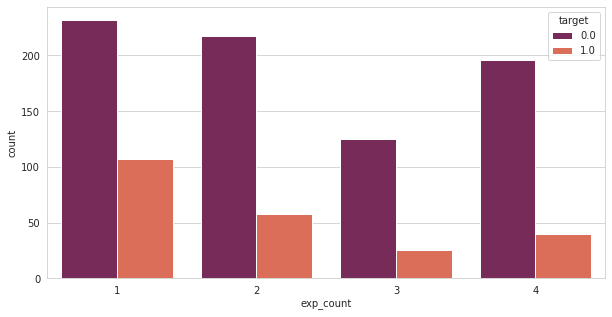

In [39]:
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'exp_count',hue="target",data=data,palette='rocket')

In [40]:
data.drop(['experience'],axis=1,inplace=True) 

In [41]:
data.drop(['exp_count'],axis=1,inplace=True) 

#### We drop this feature because it does not provide any useful insight.

### 9. Company Size
#### This feature mentions the number of employees in the current employer's company.

In [42]:
print("The number of missing values for this feature is",data["company_size"].isnull().sum())

The number of missing values for this feature is 295


In [43]:
print("The number of unique values for this feature is:",len(data["company_size"].unique())-1)

The number of unique values for this feature is: 8


<AxesSubplot:xlabel='company_size', ylabel='count'>

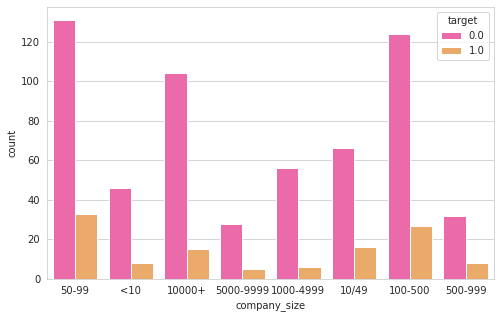

In [44]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_size',hue='target',data=data_df,palette='spring')

In [45]:
data.drop(['company_size'],axis=1,inplace=True) 

### 10. Company Type
#### This feature mentions the company type of the employer that wishes to hire.

In [46]:
print("The number of missing values for this feature is",data["company_type"].isnull().sum())

The number of missing values for this feature is 310


In [47]:
print("The number of unique values for this feature is:",len(data["company_type"].unique())-1)

The number of unique values for this feature is: 6


<AxesSubplot:xlabel='company_type', ylabel='count'>

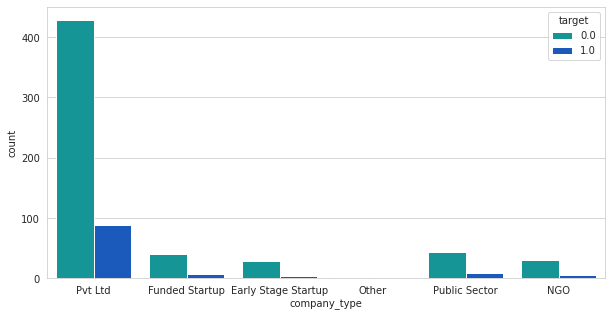

In [48]:
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_type',hue='target',data=data_df,palette='winter_r')

In [49]:
data["company_type"].fillna("Pvt Ltd", inplace = True)


ct = pd.get_dummies(data['company_type'])
data.drop(['company_type'],axis=1,inplace=True)
data = pd.concat([data,ct],axis=1)


data.drop(['Funded Startup','Early Stage Startup','NGO','Other'],axis=1,inplace=True) 

### 11. Last New Job
#### This feature mentions the difference in years between previous job and current job.

In [50]:
print("The number of missing values for this feature is",data["last_new_job"].isnull().sum())

The number of missing values for this feature is 17


In [51]:
print("The number of unique values for this feature is:",len(data["last_new_job"].unique())-1)

The number of unique values for this feature is: 6


<AxesSubplot:xlabel='last_new_job', ylabel='count'>

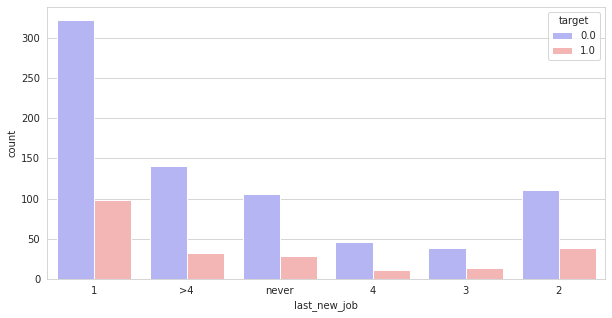

In [52]:
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'last_new_job',hue='target',data=data_df,palette='bwr')

In [53]:
data.drop(['last_new_job'],axis=1,inplace=True) 

### 12. Training Hours
#### This features mentions the training hours completed by the candidate.

In [54]:
print("The number of missing values for this feature is",data["training_hours"].isnull().sum())

The number of missing values for this feature is 0


In [55]:
print("The number of unique values for this feature is:",len(data["training_hours"].unique())-1)

The number of unique values for this feature is: 187


<AxesSubplot:xlabel='training_hours', ylabel='Density'>

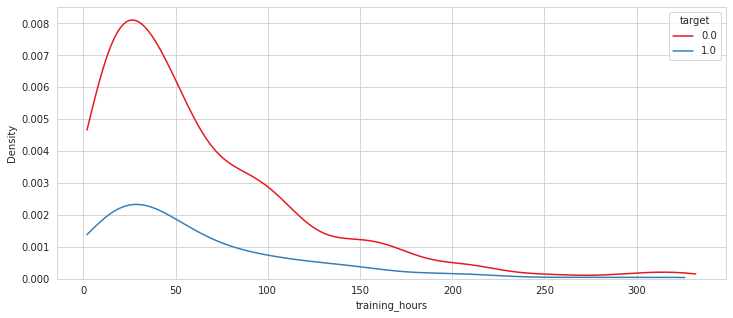

In [56]:
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')
sns.kdeplot(data=data, x="training_hours", hue="target",cut = 0,palette='Set1')

#### Here we can see that employees with fewer training hours have a lower probability of switching their jobs.

### Additional EDA

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

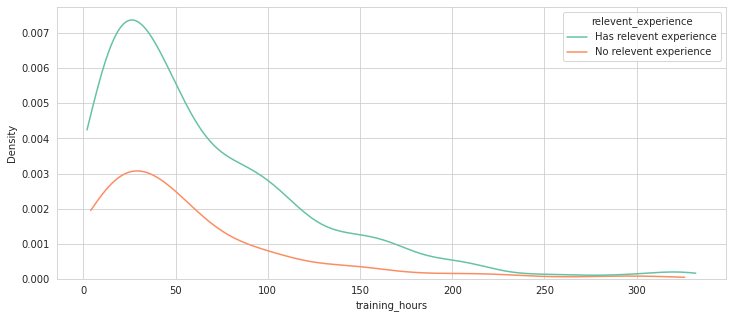

In [57]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=data_df, x="training_hours", hue="relevent_experience",cut = 0,palette='Set2')

#### The above visualization shows that there are a greater number of employees with relevant experience with lower training hours.

<AxesSubplot:xlabel='education_level', ylabel='count'>

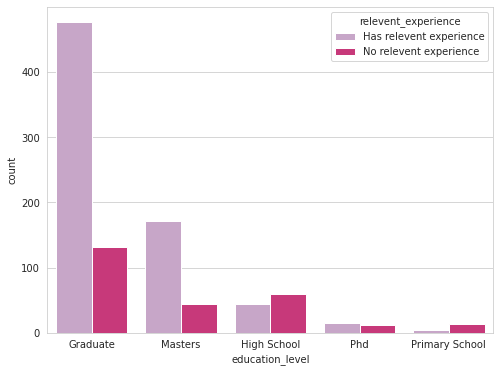

In [58]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'education_level',hue='relevent_experience',data=data_df,palette='PuRd')

#### Here we can see that graduates had more relevant experience compared to others.

### Looking at data after preprocessing 

In [59]:
data.head()

,city_development_index,training_hours,target,Female,Male,Has relevent experience,Full time course,no_enrollment,Graduate,High School,Masters,STEM,Public Sector,Pvt Ltd
0,0.920,36,1.0,0,1,1,0,1,1,0,0,1,0,1
1,0.776,47,0.0,0,1,0,0,1,1,0,0,1,0,1
2,0.624,83,0.0,0,1,0,1,0,1,0,0,1,0,1
3,0.789,52,1.0,0,1,0,0,1,1,0,0,0,0,1
4,0.767,8,0.0,0,1,1,0,1,0,0,1,1,0,0


In [60]:
data.drop(['target'],axis=1,inplace=True)

In [61]:
data.isnull().sum()

city_development_index     0
training_hours             0
Female                     0
Male                       0
Has relevent experience    0
Full time course           0
no_enrollment              0
Graduate                   0
High School                0
Masters                    0
STEM                       0
Public Sector              0
Pvt Ltd                    0
dtype: int64

## Applying Normalization

#### Normalization only needs to be applied to the "training_hours" feature, as all the rest of the features are already scaled and preprocessed.

In [62]:
from sklearn.preprocessing import MinMaxScaler
data["training_hours"] = MinMaxScaler().fit_transform(np.array(data["training_hours"]).reshape(-1,1))

In [63]:
data.head()

,city_development_index,training_hours,Female,Male,Has relevent experience,Full time course,no_enrollment,Graduate,High School,Masters,STEM,Public Sector,Pvt Ltd
0,0.920,0.103030,0,1,1,0,1,1,0,0,1,0,1
1,0.776,0.136364,0,1,0,0,1,1,0,0,1,0,1
2,0.624,0.245455,0,1,0,1,0,1,0,0,1,0,1
3,0.789,0.151515,0,1,0,0,1,1,0,0,0,0,1
4,0.767,0.018182,0,1,1,0,1,0,0,1,1,0,0


# Model Training

In [64]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix

classifiers = ['LinearSVM', 'RadialSVM', 
               'Logistic',  'RandomForest', 
               'KNeighbors','DecisionTree', 
               'GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]


In [65]:
from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

## Feature Importance
#### Checking the feature importance using 'Random Forest Feature Importance'.

Text(0.5, 0, 'Random Forest Feature Importance')

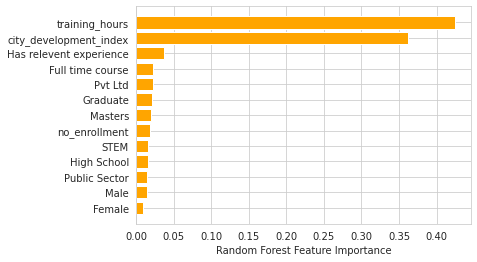

In [66]:
rf = RandomForestClassifier(n_estimators=200, random_state=0)
X_tr, X_te, Y_tr, Y_te = train_test_split(data, pred, test_size=0.25, random_state=42)
rf.fit(X_tr, Y_tr)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(data.columns[sorted_idx], rf.feature_importances_[sorted_idx],color = 'orange')
plt.xlabel("Random Forest Feature Importance")

#### Here we can see that training hours and city development index are the most significant features in this dataset, therefore we will be selecting them for model training.

In [67]:
new_data = data[["training_hours","city_development_index"]]

In [68]:
acc_score(new_data,pred)

,Classifier,Accuracy
0,GradientBoosting,0.748
1,LinearSVM,0.744
2,RadialSVM,0.744
3,Logistic,0.744
4,RandomForest,0.744
5,KNeighbors,0.740
6,DecisionTree,0.732


#### Gradient boosting gives the maximum accuracy among all the classifiers.

## Ensembling Model

#### We will also observe the results given by the Voting Classifier.

In [69]:
from sklearn.ensemble import VotingClassifier

X_tr, X_te, Y_tr, Y_te = train_test_split(new_data, pred, test_size=0.25, random_state=42)
estimator = []
estimator.append(('GB', GradientBoostingClassifier(random_state=0)))
estimator.append(('SVC',svm.SVC(kernel='rbf')))
estimator.append(('RF',RandomForestClassifier(n_estimators=200, random_state=0)))

voting = VotingClassifier(estimators = estimator)
voting.fit(X_tr, Y_tr)
Y_pred1 = voting.predict(X_te)
  
score = accuracy_score(Y_te, Y_pred1)
print("Voting Score :",score)

Voting Score : 0.744


# Hyperparameter Tuning

#### Applying GradientBoostingClassifier with hyperparameter tuning

In [70]:
gbc = GradientBoostingClassifier(random_state=0)

param_grid = { 
    'learning_rate':[0.01,0.001],
    'n_estimators': [600,750,800],
    'max_features': [ 'sqrt'],
    'max_depth' : [8,9,10]
}

In [71]:
from sklearn.model_selection import GridSearchCV
X_tr, X_te, Y_tr, Y_te = train_test_split(new_data, pred, test_size=0.25, random_state=42)
CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv= 5,n_jobs = 1)
CV_gbc.fit(X_tr,Y_tr)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.001],
                         'max_depth': [8, 9, 10], 'max_features': ['sqrt'],
                         'n_estimators': [600, 750, 800]})

In [72]:
CV_gbc.best_params_

{'learning_rate': 0.001,
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 750}

#### These are the best paramters after hyperparamter tuning.

In [73]:
tuned_gbc = GradientBoostingClassifier(learning_rate= 0.001,
                                       max_depth= 9,
                                       max_features= 'sqrt',
                                       n_estimators= 750,
                                       random_state=0)

In [74]:
tuned_gbc.fit(X_tr,Y_tr)
Y_pred = tuned_gbc.predict(X_te)

print("Accuracy after optimization :",accuracy_score(Y_te, Y_pred))

Accuracy after optimization : 0.784


#### Here we can see an improvement of 3.6% after hyperparameter tuning.

### Confusion Matrix

[[181   5]
 [ 49  15]]


Text(51.0, 0.5, 'Truth')

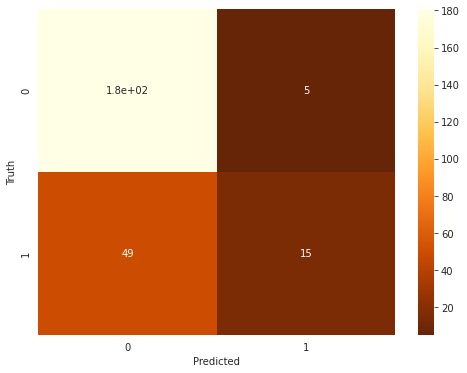

In [75]:
cm = confusion_matrix(Y_te, Y_pred)
print(cm)

plt.figure(figsize = (8,6))
sns.heatmap(cm, annot=True, cmap = 'YlOrBr_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification Report

In [76]:
from sklearn.metrics import classification_report
print(classification_report(Y_te, Y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87       186
         1.0       0.75      0.23      0.36        64

    accuracy                           0.78       250
   macro avg       0.77      0.60      0.61       250
weighted avg       0.78      0.78      0.74       250



### ROC Curve

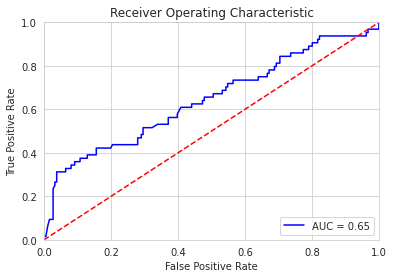

In [77]:
tuned_gbc.fit(X_tr,Y_tr)
probs = tuned_gbc.predict_proba(X_te)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_te, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()